# Predicting Milk Quality


# Introduction and Overview



### A description of the data The information is gathered from a state's various milk producers. Here we have taken the 5 categories of data from the samples collected. Those are the ph (acidity level of the milk), The texture of the milk , the taste of the milk , the fat percentage of the milk , the turbility (calarity) of the milk , and the grade of the milk .

### Units of the data collected from the producers :

##### 1. The logarithemic units represent the pH of the milk.

##### 2. The milk's temperature is measured in Fahrenheit.

##### 3. The taste is represented as a binary integer, where 0 indicates a bad taste and 1 indicates a good taste.

##### 4. The odour is taken as a binary unit where 0 means a bad odour from the milk and 1 means a good odour from the milk 

##### 5. The fat percentage of milk is taken as 0 means good 1 for bad

##### 6. Turbidity refers to the milk's clarity.We were using the binary units that 0 means no turbidity of the milk and 1 means good turbidity of the milk.

##### 7. There are 9 catagories of colours of milk 

##### 8. The grade is classified into three levels: low, medium, and high.



### Aim : Here we are trying to find which milk is the best for consumption by calculating the accuracy of model. The grade is the target variable  and the other columns are predictors. Our main goal in this assignment is to find which milk is best for consumption with the help of predictors using different data models .In the preceding data, grade is used to calculate the multi-level classification. It is the target variable, and it has three classifications: low, medium, and high.


# Importing all Required Libraries

In [142]:
# import packages
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as pltB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score ,f1_score,classification_report, make_scorer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.utils import resample
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler

# Loding data

In [143]:
df = pd.read_csv('milknew.csv') #loading data


# Explore the dataset

In [144]:
df.head() # checking first 5 columns

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [145]:
df.shape # checking number of rows and columns

(1059, 8)

In [146]:
df.columns #chcecking column names

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [147]:
df.describe() #Statistical Summary of columns

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [148]:
df.info() #information abour data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


# Clean data

In [149]:
df.columns = [s.strip().replace(' ', '_') for s in df.columns] #replacing colums names which has spaces with the "_"

#### We have changed the coloumn names here in a more readable and reliable way by adding an underscore in between the spaces. This will be more lookable and ideal.

In [150]:
df.isna().sum() #Checking for null values

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

### We dont have any NA values in dataset 

In [151]:
df.dtypes # checking data types of colunms

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

# Transform data

#### Change the datatype to category which is feasible to find the relationship between the variables.

In [152]:
df['Grade']=df['Grade'].astype('category') 

In [153]:
df.dtypes # checking data types of colunms

pH             float64
Temprature       int64
Taste            int64
Odor             int64
Fat              int64
Turbidity        int64
Colour           int64
Grade         category
dtype: object

#### We have performed ordinal encoding on the predictor variables here to change the category type variables to an integer value. This will help the model to improve the predictions.

In [154]:
temp=OrdinalEncoder()
df.Taste=temp.fit_transform(df[['Taste']])
df.Odor=temp.fit_transform(df[['Odor']])
df.Fat=temp.fit_transform(df[['Fat']])
df.Turbidity=temp.fit_transform(df[['Turbidity']])
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1.0,0.0,1.0,0.0,254,high
1,6.6,36,0.0,1.0,0.0,1.0,253,high
2,8.5,70,1.0,1.0,1.0,1.0,246,low
3,9.5,34,1.0,1.0,0.0,1.0,255,low
4,6.6,37,0.0,0.0,0.0,0.0,255,medium


In [155]:
Category_Features = ['Taste','Odor', 'Fat','Turbidity']

In [156]:
# create the training set and the test set 
target = 'Grade'
predictors = list(df.columns) #Assigning Predictors and coverting pandas series object to list.
predictors.remove(target)


In [157]:
enc = LabelEncoder() 
df[target]=enc.fit_transform(df[target])
df.dtypes



pH            float64
Temprature      int64
Taste         float64
Odor          float64
Fat           float64
Turbidity     float64
Colour          int64
Grade           int32
dtype: object

#### Checking the Number of groups in target column and there count

In [158]:
df['Grade'].value_counts() 

1    429
2    374
0    256
Name: Grade, dtype: int64

In [159]:
df.shape

(1059, 8)

In [160]:
X=df[predictors]
y=df[target]

# Split data into training and validation sets

In [161]:

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

train_y.value_counts()

1    287
2    269
0    185
Name: Grade, dtype: int64

# Data Balacing

#### Since, the data is not balanced with respect to the target variable, we have performed the oversampling on the data to avoid the discrepancy between observations of the target.

In [162]:
ros = RandomOverSampler(random_state=1)
train_X, train_y = ros.fit_resample(train_X, train_y)
train_y.value_counts()


1    287
0    287
2    287
Name: Grade, dtype: int64

In [163]:
for i in Category_Features: #Removing 
    predictors.remove(i)
predictors #Checking Predictors list.
train_X[predictors]

,pH,Temprature,Colour
0,3.0,40,255
1,6.6,45,250
2,8.5,70,246
3,5.5,45,250
4,6.6,37,255
...,...,...,...
856,6.8,45,240
857,6.8,45,255
858,6.5,36,247
859,6.5,38,255


#  Standardzation of quantitative features

In [164]:

# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(train_X[predictors])

# Transform the predictors of training, validation and newCustomer
train_scaled_data= scaler.transform(train_X[predictors])
test_scaled_data = scaler.transform(test_X[predictors])



#### Here we are adding back the Standardized values back to dataframe after scaling them.

In [165]:
s=0
for i in predictors:
    train_X[i]=train_scaled_data[:,s]
    test_X[i]=test_scaled_data[:,s]
    s=s+1
    


#### Since, continuous variables are measured in different scales we performed standardization to get them into the same scale. Here we have performed the same on train_predictors and validation_predictors. Firstly, we have removed our categorical variables and the target variable, since we should not perform standardizing on them. Later, we will append thoe category features list to the standardized dataframe. Finally, we get a standardized dataframe.

# Prediction with K-NN

In [166]:
knn = KNeighborsClassifier()
_ = knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
print('Accuracy using default parameters :',accuracy_score(test_y,y_pred))

Accuracy using default parameters : 0.9748427672955975


In [167]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
     'n_neighbors': list(range(1,round(np.sqrt(len(df))),2)),
    'metric': ['euclidean', 'cosine','manhattan','minkowski'],
    'weights':['uniform','distance']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1,error_score='raise')  # n_jobs=-1 will utilize all available CPUs 
grid_result=gridSearch.fit(train_X, train_y)
Y_predict=gridSearch.predict(test_X)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

Best_accuracy_knn = grid_result.best_score_

accuracy score:  0.9988372093023254
parameters:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}



#### K-NN is a supervised machine learning algorithm that can solve both classification and regression problems. This is one of the simplest yet most powerful algorithms. Save the training data instead of learning the discriminant function from the training data. It is also called a "lazy algorithm" for the same reason.
#### The parameters that we have used here are :
#### 1. n_neighbours: The range of N number will be odd number from 1 to square root of number of observations.
#### 2. metric: The metric we used here is Euclidian distance.
#### 3. Weights: Weighted kNN is a modified version of k nearest neighbors.
#### Here, the training data means 70 % of the actual data, including the target variable. We are implementing the k-nn model on this data and finding the accuracy of the data set .After performing hyperparameter tuning when k-fold value is 10, we got the best model at n_estimators: ,metric, Weights: with Accuracy of Accuracy score: 0.9988372093023254.

# Split data into training and validation sets

In [168]:
# create the training set and the test set 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [169]:
### Here I am performing Data split again because for knn we did standaiztion of predictors.

# Prediction with Decision Tree

In [170]:
#Decision Tree 
dtree=DecisionTreeClassifier(random_state=3)
_ = dtree.fit(train_X, train_y)
y_pred = dtree.predict(test_X)
print('Accuracy using default parameters :',accuracy_score(test_y, y_pred))



Accuracy using default parameters : 1.0


In [171]:
from sklearn.metrics import make_scorer

param_grid = {

    'criterion':  ['gini','entropy','log_loss'],
    'max_depth':  [2]+list(range(5,50,5)),
     'min_samples_leaf': range(2,len(train_X.columns),1) , 
     'min_samples_split': range(2,len(train_X.columns),1)
    

}

best_grid_search_model_DT = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,cv=10, n_jobs=-1,verbose=1)

_ = best_grid_search_model_DT.fit(train_X, train_y)

print('Accuracy', 'score: ', best_grid_search_model_DT.best_score_)

print('parameters: ', best_grid_search_model_DT.best_params_)
Best_accuracy_DT = best_grid_search_model_DT.best_score_

Fitting 10 folds for each of 750 candidates, totalling 7500 fits
Accuracy score:  0.9892072072072073
parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


#### The default decision tree model tends to overfit the data and got an accuracy score of 1. To overcome the model's overfitting, we performed pruning. We have tuned a decision tree on the
- #### maximum depth that we allow the tree to grow,min_Samples_split The bare minimum of samples needed to split an internal, 
- #### min_samples_leaf The minimum number of samples that we can specify to term a given node as a leaf node so that we do not want to split it further is
- #### min_samples_split The minimum number of samples required to split, 
- #### The criterion of has different functions that measure the quality of a split, Gini,entropy,log_loss. 
#### After performing hyperparameter tuning when k-fold value is 10, we got the best model at 'criterion': 'gini' , 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2 with Accuracy of Accuracy score: 0.9892072072072073. 

# Prediction with Random Forest

In [172]:
#Random Forest
rforest = RandomForestClassifier(random_state=1)
_ = rforest.fit(train_X, train_y)
y_pred = rforest.predict(test_X)
print('Accuracy using default parameters :',accuracy_score(test_y, y_pred))


Accuracy using default parameters : 1.0


In [173]:
from sklearn.metrics import make_scorer

param_grid = {
    "n_estimators": range(20,100,20),
    'max_features':np.arange(0.1, 1, 0.1),
    'max_depth': [3, 5, 7, 9],
    'max_samples': [0.3, 0.5, 0.8], 

         }
            
best_grid_search_model = GridSearchCV(estimator=RandomForestClassifier(random_state=1), 
                                    scoring='accuracy', param_grid=param_grid, cv=10, verbose=1,  n_jobs = -1,error_score='raise')
_ = best_grid_search_model.fit(train_X, train_y)
print('Accuracy', 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_accuracy_RF = best_grid_search_model.best_score_

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Accuracy score:  0.9972972972972972
parameters:  {'max_depth': 7, 'max_features': 0.1, 'max_samples': 0.5, 'n_estimators': 20}


#### Overfitting is prevented by using random forests, and produce results based on majority ranking.
#### The Parameters that we have used here are :
#### 1. n_estimators : Number of trees we want to build before taking the maximum averages of predictions. Though, higher number of trees improves the performance, it will make the code to run slower. We have taken an ideal range of 20 to 100.
#### 2. max_features : The maximum number of features Random Forest is allowed to try in individual tree.
#### 3. max_depth : Here, we have considered the longest path between the root node and leaf node in a list.
#### 4. max_samples : We have taken the sample size in a list with an iteration ranges from 30 percent to 80 percent.
#### By calling the Random forest function setting all of these parameters, we could find the optimal model at the 'max_depth': 7, 'max_features': 0.1, 'max_samples': 0.5, 'n_estimators': 20 with an accuracy of 0.9972972972972972.

# Prediction with AdaBoostClassifier

In [174]:
#AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=3)
_ = adaboost.fit(train_X, train_y)
y_pred = adaboost.predict(test_X)
print('Accuracy using default parameters :',accuracy_score(test_y, y_pred))
 



Accuracy using default parameters : 0.9276729559748428


In [175]:
param_grid = {
             'learning_rate': [0.7,0.8,0.9,1.0],
           'n_estimators': range(1,50,1)
              }
best_grid_search_model = GridSearchCV(estimator=AdaBoostClassifier(random_state=3),
                                    scoring='accuracy', param_grid=param_grid, cv=10, verbose=1,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)
print('accuracy', 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_accuracy_AdaBoost = best_grid_search_model.best_score_


Fitting 10 folds for each of 196 candidates, totalling 1960 fits
accuracy score:  0.9527207207207209
parameters:  {'learning_rate': 1.0, 'n_estimators': 11}


#### The default adaboost model has an accuracy score of 0.9276729559748428 and tends to overfit the data. Pruning was used to overcome the model's overfitting. We customized adaboost using the three most critical parameters: n estimators, learning rate, and loss.
- #### n_estimators : Number of trees we want to build before taking the maximum averages of predictions. Though, higher number of trees improves the performance, it will make the code to run slower. We have taken an ideal range of 1 to 50.
- #### learning rate: learning rate represents each model's contribution to the weights and is set to 1 by default. When the learning rate is reduced, the weights are slightly increased or lowered, causing the model train to go slower (but sometimes resulting in better performance scores).
- #### loss: leave it at default because the loss is unique to AdaBoostRegressor and determines the loss function to employ while updating weights. This is set to a linear loss function by default, but it may be altered to a square or exponential loss function.
#### After performing hyperparameter adjustment with a k-fold value of 10, we achieved the best model with parameters 'learning rate': 1.0, 'n estimators': 11, leaving loss function to default, and Accuracy of Accuracy score: 0.9527207207207209.

# Prediction with GradientBoosting

In [176]:
#GradientBoosting
gboost = GradientBoostingClassifier(random_state=3)
_ = gboost.fit(train_X, train_y)
y_pred = gboost.predict(test_X)
print('Accuracy using default parameters :',accuracy_score(test_y, y_pred))




Accuracy using default parameters : 1.0


In [177]:
param_grid = { 
               'n_estimators' : [25, 50 ,75, 100, 200],
              'learning_rate': [0.005 ,0.05, 0.5, 1.5],
              'max_depth': [2, 4, 6, 8],
       
              }
best_grid_search_model = GridSearchCV(estimator=GradientBoostingClassifier(random_state=3), 
                                    scoring='accuracy', param_grid=param_grid, cv=10, verbose=1,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)
print('accuracy', 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_accuracy_GB = best_grid_search_model.best_score_

Fitting 10 folds for each of 80 candidates, totalling 800 fits
accuracy score:  0.9972972972972972
parameters:  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}


#### Gradient boosting is a powerful technique for developing predictive models. Gradient boosting is a greedy algorithm that can quickly overfit a training dataset. It can benefit from regularization methods that penalize different parts of the algorithm and improve overall algorithm performance by reducing overfitting.
#### Tunign n_estimators and Learning rate:
- #### The number of trees we add to the model is recorded by the variable n estimators. It can be costly computationally to process many trees. In general, n estimators should be changed to reflect changes in learning rate (a 10-fold drop in learning rate should correspond to an approximately 10-fold increase in n_estimators).
- #### It can be said from the low learning_rate value of 0.05 that the n_estimators value is going to be high that seems to be the case as the best n_estimators ended up being : 100.
- #### max_depth. This indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. 
#### The default Gradiant Bossting model tends to overfit the data and got an accuracy score of 1. To overcome the model's overfitting, we performed hypertuning. We have tuned gradiant boosting on the maximum depth that we allow the tree to grow, After performing hyperparameter tuning we got the best model at learning_rate': 0.05 , 'max_depth': 4, n_estimators': 100, with Accuracy of Accuracy score: 0.9972972972972972.

# Prediction with XGBClassifier

In [178]:

#XGBClassifier
xgboost = XGBClassifier(random_state=3)
_ = xgboost.fit(train_X, train_y)
y_pred = xgboost.predict(test_X)
print('Accuracy using default parameters :',accuracy_score(test_y, y_pred))




Accuracy using default parameters : 1.0


In [179]:
param_grid = { 
              'max_depth': range(2,10,1),
           'learning_rate': [0.2,0.1, 0.01, 0.05],
           'n_estimators': range(40,200,40)
              }
best_grid_search_model = GridSearchCV(estimator=XGBClassifier(random_state=3), 
                                    scoring='accuracy', param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)
print('accuracy', 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_accuracy_XGB = best_grid_search_model.best_score_

accuracy score:  0.9986486486486486
parameters:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 160}


#### Extreme Gradient Boosting (XGBoost) is a distributed, scalable gradient-boosted decision tree (GBDT) machine learning framework. The top machine learning library for regression, classification, and ranking issues, it offers parallel tree boosting.
#### Here we used max depth, learning_rate, and n_estimators as parameters. Max depth is the maximum depth of the tree. learning_rate parameter can be set to control the weighting of new trees added to the model. n estimators are the number of runs the model will try to learn. After hyper tuning, the best values for parameters are max depth: 4, learning rate: 0.1, and n estimators:120. Hence, we obtained the accuracy = 0.9986486486486486

# Summarize results    

In [180]:
Algorithms = ['knn','DecisionTree','RandomForest','AdaBoostClassifier','GradientBoosting','XGBClassifier']
accuracy=[Best_accuracy_knn,Best_accuracy_DT,Best_accuracy_RF,Best_accuracy_AdaBoost,Best_accuracy_GB,Best_accuracy_XGB]
score_df = pd.DataFrame(list(zip(Algorithms, accuracy)),
               columns =['Algorithm', 'accuracy'])
score_df


,Algorithm,accuracy
0,knn,0.998837
1,DecisionTree,0.989207
2,RandomForest,0.997297
3,AdaBoostClassifier,0.952721
4,GradientBoosting,0.997297
5,XGBClassifier,0.998649


In [181]:
print("Accuracy scores...")
print(f"{'K-NN:':11}       {Best_accuracy_knn}")
print(f"{'Decision Tree:':11}    {Best_accuracy_DT}")
print(f"{'Random Forest:':11}    {Best_accuracy_RF}")
print(f"{'Ada Boosted:':11}      {Best_accuracy_AdaBoost}")
print(f"{'GradientBoosting:':11} {Best_accuracy_GB}")
print(f"{'XGBoost:':11}       {Best_accuracy_XGB}")

Accuracy scores...
K-NN:             0.9988372093023254
Decision Tree:    0.9892072072072073
Random Forest:    0.9972972972972972
Ada Boosted:      0.9527207207207209
GradientBoosting: 0.9972972972972972
XGBoost:          0.9986486486486486


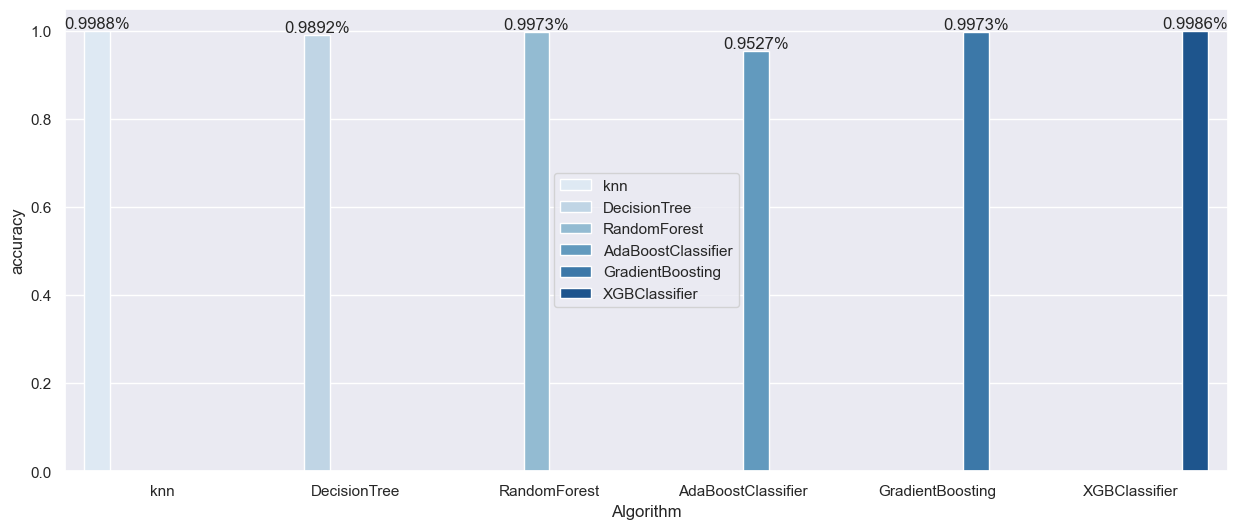

In [197]:
sns.set(rc = {'figure.figsize':(15,6)})
ax= sns.barplot(x = 'Algorithm',
            y = 'accuracy',
            hue='Algorithm',
            data = score_df,palette = "Blues",ci=None)
for i in ax.containers:
     ax.bar_label(i,fmt='%.4f%%')
# Show the plot
plt.legend(loc='center')
plt.show()

# Business conclusion

- #### Overall the quality of the data is excellent. This is evident from the fact that we were able to accurately predict the output using various models every time.      
- #### We have used knn, decision tree, ada boost, random forest, gradient boost as well as xg boost to create prediction models.The least accuracy.we were able to output was 95.2% for ada boost.This level of accuracy is necessary while investigating food-related predictions, especially those which could cause a medical or legal problem.                    
- #### Due to the nature of the split between low, medium, and high, and the fact that both FPs and FNs lead to potential loss(either through wastage or medical expenses due to food poisoning) led us to take accuracy as the metric that will be used to determine if a model is good or not.               
- #### While all models generated good results K-NN classifier came out as the Best with an accuracy score of 99.88%.
- #### K-NN is Recommended model to deployed for getting prediction on milk quality.